# Microarray analysis

In [2]:
library("limma")
library("ggplot2")
library("ggrepel")
library("ggfortify")
library("heatmap3")
library("biomaRt")
library("dplyr")
library("tidyr")


In [3]:
samples = read.csv2("/home/fran/Documents/fran-labo/Microarrays/GSE30595/samples.csv",header = F)
samples


# Leer los archivos txt

In [70]:
data = read.maimages(samples$V1, source = "agilent", green.only=TRUE)

Read GSM758901.txt 
Read GSM758903.txt 
Read GSM758908.txt 
Read GSM758910.txt 
Read GSM758914.txt 
Read GSM758921.txt 
Read GSM758924.txt 
Read GSM758928.txt 
Read GSM758944.txt 
Read GSM758951.txt 
Read GSM758956.txt 
Read GSM758961.txt 
Read GSM758964.txt 
Read GSM758968.txt 
Read GSM758973.txt 


In [4]:
samples

Gene_Symbol,WT_1.gProcessedSignal,WT_2.gProcessedSignal,Clon_4.gProcessedSignal,Clon_10.gProcessedSignal,RNA7_FN1_1.gProcessedSignal,RNA7_FN1_2.gProcessedSignal,RNA5_TLR4_1.gProcessedSignal,RNA5_TLR4_2.gProcessedSignal
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,1385.951000,2462.188000,1869.043000,2887.782000,1150.153000,1667.647000,984.107400,777.811100
LINC02615,3.412794,3.409920,11.550750,3.635055,3.672954,3.849384,6.798984,7.250548
LOC145474,20.109310,65.763980,40.979870,103.115900,110.580800,227.259000,101.170800,77.031590
LINP1,125.424300,241.432900,198.726200,89.555890,29.480540,29.584790,66.685530,40.632620
KIAA0040,2.245853,3.463457,15.185690,4.143822,4.747560,2.638522,7.226670,3.053636
LINC02541,2.487944,3.073503,3.093356,6.440082,2.557789,3.010060,4.966506,3.202615
NA,2.455807,3.058956,3.411150,3.552521,2.546655,2.988913,3.372188,3.160093
PRKCQ-AS1,15.982930,23.093690,23.069970,25.863590,9.306565,21.751030,31.382990,21.956660
LINC00458,2.524435,2.984406,2.931263,3.208516,2.775294,3.394076,3.262175,3.477665


First we prepare the filenames to load the data

In [2]:
targets=read.csv2("samples.csv", sep=",", header=T)

## HEK vs Ref1

We load the arrays correspondent to the HEK cells

In [4]:
#raw_data = read.maimages(targets$sampleName[1:4], source="agilent")

Read 1_1.txt 
Read 1_2.txt 
Read 1_3.txt 
Read 1_4.txt 


In [37]:
#raw_data_HEK

ERROR: Error in eval(expr, envir, enclos): object 'raw_data_HEK' not found


Now let's normalize the arrays

In [72]:
#data_normW_HEK = normalizeWithinArrays(samples2, method = 'loess', bc.method = "auto", offset = 20)
bc_data <- backgroundCorrect(data, method = 'normexp') # Calcula el ruido de backround de las muestras
norm_samples = normalizeBetweenArrays(bc_data, method="quantile") #Normaliza segun en backround calculado  

Array 1 corrected
Array 2 corrected
Array 3 corrected
Array 4 corrected
Array 5 corrected
Array 6 corrected
Array 7 corrected
Array 8 corrected
Array 9 corrected
Array 10 corrected
Array 11 corrected
Array 12 corrected
Array 13 corrected
Array 14 corrected
Array 15 corrected


In [73]:
norm_samples

GSM758901,GSM758903,GSM758908,GSM758910,GSM758914,GSM758921,GSM758924,GSM758928,GSM758944,GSM758951,GSM758956,GSM758961,GSM758964,GSM758968,GSM758973
15.500780,15.986605,15.965683,16.045909,14.460871,15.909252,15.362962,15.383028,15.277886,15.841404,15.835707,15.587133,14.784568,15.675338,16.412062
5.246555,5.176809,5.124927,5.484935,5.228817,5.338176,5.061064,5.204352,5.610233,6.052008,5.969550,5.106201,5.407526,5.071113,5.147374
5.212049,4.957070,5.024850,5.484935,5.179465,5.204352,5.227534,5.005518,5.252875,5.993854,5.576010,5.053844,5.195192,5.176809,5.106201
5.212049,5.018929,5.075398,5.750321,5.275298,5.314904,5.117327,5.241479,5.380257,5.980207,6.377373,5.156841,5.276539,5.409790,4.967867
6.512724,7.921517,6.338203,7.556115,7.429271,5.930018,7.529436,5.810451,7.225079,7.082448,8.008763,5.905460,7.960356,6.703412,6.659934
5.524492,6.556212,5.505563,6.966683,7.441208,5.674964,6.647552,5.788114,6.727616,8.217175,8.278780,5.820697,7.083689,6.933670,5.745847
10.322682,9.739475,10.430507,9.989895,9.816214,9.604527,9.972337,9.517149,9.481502,9.939632,8.787204,10.434926,9.975541,9.667619,11.171898
5.279018,9.021172,5.347655,7.403674,9.864113,5.351688,7.651588,5.204352,8.495401,9.151573,9.172809,4.955521,8.008576,8.053337,5.723393
6.085594,7.324945,5.907864,7.599510,6.333470,5.930018,7.440932,6.474122,7.703824,8.199780,8.174538,6.318213,7.299242,7.031983,6.912703
10.699213,12.876316,11.465253,12.932138,11.578728,12.256902,12.908184,11.956637,12.793052,12.233076,11.702513,12.059959,13.082041,11.942949,11.515874


In [75]:
which(norm_samples$genes$SystematicName == "NM_000618")

[1]   700   819  2254  5815  7925  9274 11181 12279 13329 13622

In [76]:
norm_samples$M[c(2366,53056),]

NULL

In [77]:
summary(norm_samples$M)

Length  Class   Mode 
     0   NULL   NULL 

### Post-Normalization Quality Controls

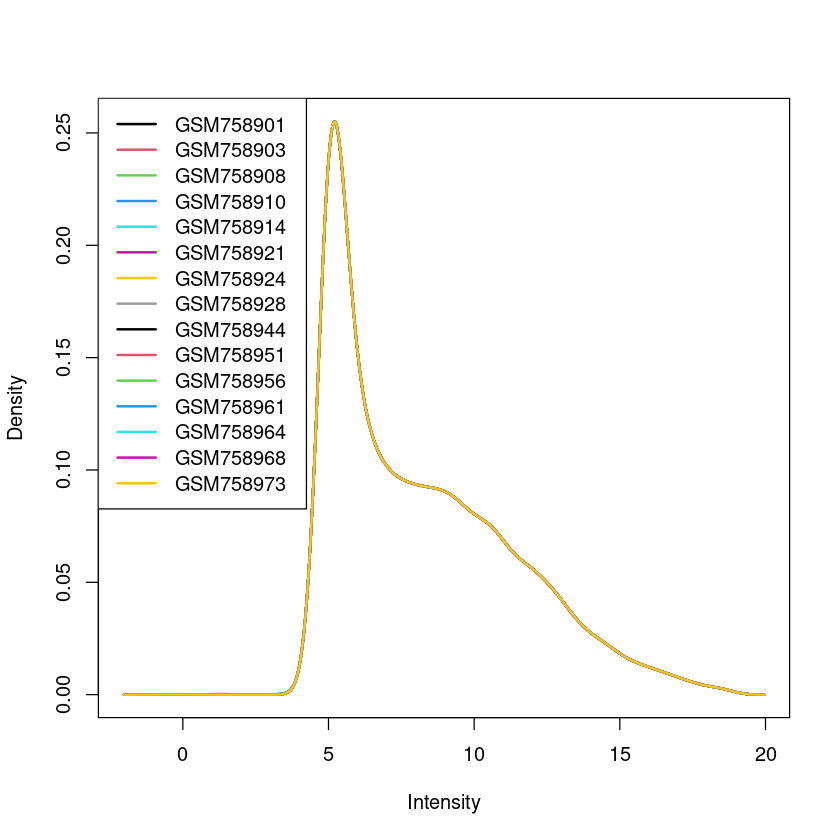

In [78]:
options(repr.plot.width=7, repr.plot.height=7)
plotDensities(norm_samples)

In [79]:
data_norm_samples <- avereps(norm_samples, ID = norm_samples$genes$SystematicName)

In [80]:
which(data_norm_samples$genes$SystematicName == "NM_000618")

[1] 628

### Differential Expression

In [109]:
fit_samples = lmFit(data_norm_samples)
fit_eb_samples = eBayes(fit_samples)

top_table_samples = topTable(fit_eb_samples, adjust = 'BH', coef = 1, number = 99999, lfc=0.58, p.value = 0.05)


In [107]:
top_table_samples[which(top_table_samples$SystematicName == "NM_000618"),]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_000618,9,44,0,A_23_P13907,NM_000618,5.312238,5.312238,37.84079,6.039549e-17,7.213806e-17,29.20834


In [108]:
top_table_samples[which(top_table_samples$ControlType == 0),]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_003134,37,20,0,A_23_P14876,NM_003134,15.62616,15.62616,256.6929,4.580823e-30,2.474975e-26,52.59286
NM_021103,93,54,0,A_23_P68106,NM_021103,16.47067,16.47067,251.8940,6.174317e-30,2.474975e-26,52.48370
NM_001030,55,76,0,A_24_P148235,NM_001030,17.31358,17.31358,231.0527,2.420205e-29,3.774048e-26,51.94907
NM_080822,188,17,0,A_23_P118462,NM_080822,12.77452,12.77452,230.0710,2.588811e-29,3.774048e-26,51.92119
NM_001009552,183,67,0,A_23_P134693,NM_001009552,12.26879,12.26879,229.4580,2.700391e-29,3.774048e-26,51.90365
NM_014874,80,44,0,A_23_P126135,NM_014874,13.25561,13.25561,228.8069,2.824534e-29,3.774048e-26,51.88490
NM_003721,58,5,0,A_23_P165180,NM_003721,11.79419,11.79419,220.7515,4.979020e-29,4.774837e-26,51.64287
NM_016039,135,35,0,A_23_P14482,NM_016039,13.48136,13.48136,219.4019,5.486186e-29,4.774837e-26,51.60041
NM_032837,47,65,0,A_23_P78289,NM_032837,11.52748,11.52748,218.3180,5.933179e-29,4.774837e-26,51.56591


In [110]:
top_table_samples = top_table_samples[which(top_table_samples$ControlType == 0),]
write.csv(top_table_samples, "DE_samples.csv")

### VolcanoPlot, Heatmap and PCA

In [119]:
full_matrix = data_norm_samples$E
rownames(full_matrix) = data_norm_samples$genes$ProbeName

In [120]:
heatmap_plot <- function(tops, norm_matrix){
  top_matrix=subset(norm_matrix, rownames(norm_matrix) %in% tops$ProbeName)
  top_matrix=top_matrix[, order(colnames(top_matrix)), drop=F]
  heatmap3(top_matrix,
           Colv=NA, Rowv = NULL,
           showColDendro=F,
           showRowDendro=T,
           balanceColor = TRUE,
           xlab="Samples",
           ylab="Genes",
           labRow=rownames(top_matrix),
           labCol = colnames(top_matrix),
           cexCol = 1.5, cex.main=10, cexRow=2,
           margins=c(10,15))
}

In [121]:
options(repr.plot.width=13, repr.plot.height=13)
png("heatmap.png", width = 500, height = 500)
heatmap_plot(top_table_samples, full_matrix)
dev.off()



png 
  2

## H247 vs H322

In [174]:
design_HEK_vars = model.matrix(~0+targets$Variant[1:4])
fit_HEK_vars = lmFit(data_normB_HEK, design_HEK_vars)
fit_eb_HEK_vars = eBayes(fit_HEK_vars)
top_table_HEK_vars = topTable(fit_eb_HEK_vars, adjust = 'BH', coef = 1, number = 99999, lfc=0.58, p.value = 0.05)

In [175]:
top_table_HEK_vars[which(top_table_HEK_vars$SystematicName == "NM_000618"),]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_000618,15,70,0,A_23_P13907,NM_000618,1.200641,7.694383,12.57262,6.629005e-07,0.0008753427,6.509108


In [176]:
top_table_HEK_vars[which(top_table_HEK_vars$ControlType == 0),]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_020677,163,83,0,A_23_P26649,NM_020677,-1.812246,6.748795,-21.81855,6.101806e-09,0.0001076817,9.956058
ENST00000647353,83,91,0,A_22_P00011158,ENST00000647353,1.559174,7.795679,18.85212,2.142858e-08,0.0001194715,9.154861
NM_018933,351,73,0,A_23_P144627,NM_018933,1.536348,9.046189,17.55684,3.940223e-08,0.0001977125,8.731998
NM_153350,127,70,0,A_23_P406385,NM_153350,-1.337287,8.506927,-15.76723,9.845161e-08,0.0004050781,8.056224
NR_046287,384,151,0,A_22_P00012736,NR_046287,-1.476643,8.664979,-15.24877,1.307354e-07,0.0004157812,7.837629
NM_001702,296,153,0,A_33_P3285470,NM_001702,-1.297485,9.187605,-15.11368,1.409707e-07,0.0004157812,7.778820
ENST00000570163,306,51,0,A_19_P00809417,ENST00000570163,-1.232024,8.455595,-14.85933,1.627466e-07,0.0004157812,7.665935
NM_019071,7,97,0,A_23_P111811,NM_019071,1.346437,8.845606,14.79235,1.690854e-07,0.0004157812,7.635728
NM_138463,283,20,0,A_23_P420417,NM_138463,1.467502,7.285469,14.61691,1.870263e-07,0.0004157812,7.555648


In [181]:
top_table_HEK_vars = top_table_HEK_vars[which(top_table_HEK_vars$ControlType == 0),]
write.csv(top_table_HEK_vars, "DE_H247_H322.csv")

In [182]:
full_matrix_HEK_vars = data_normB_HEK$M
rownames(full_matrix_HEK_vars) = data_normB_HEK$genes$ProbeName

PNG 
  2

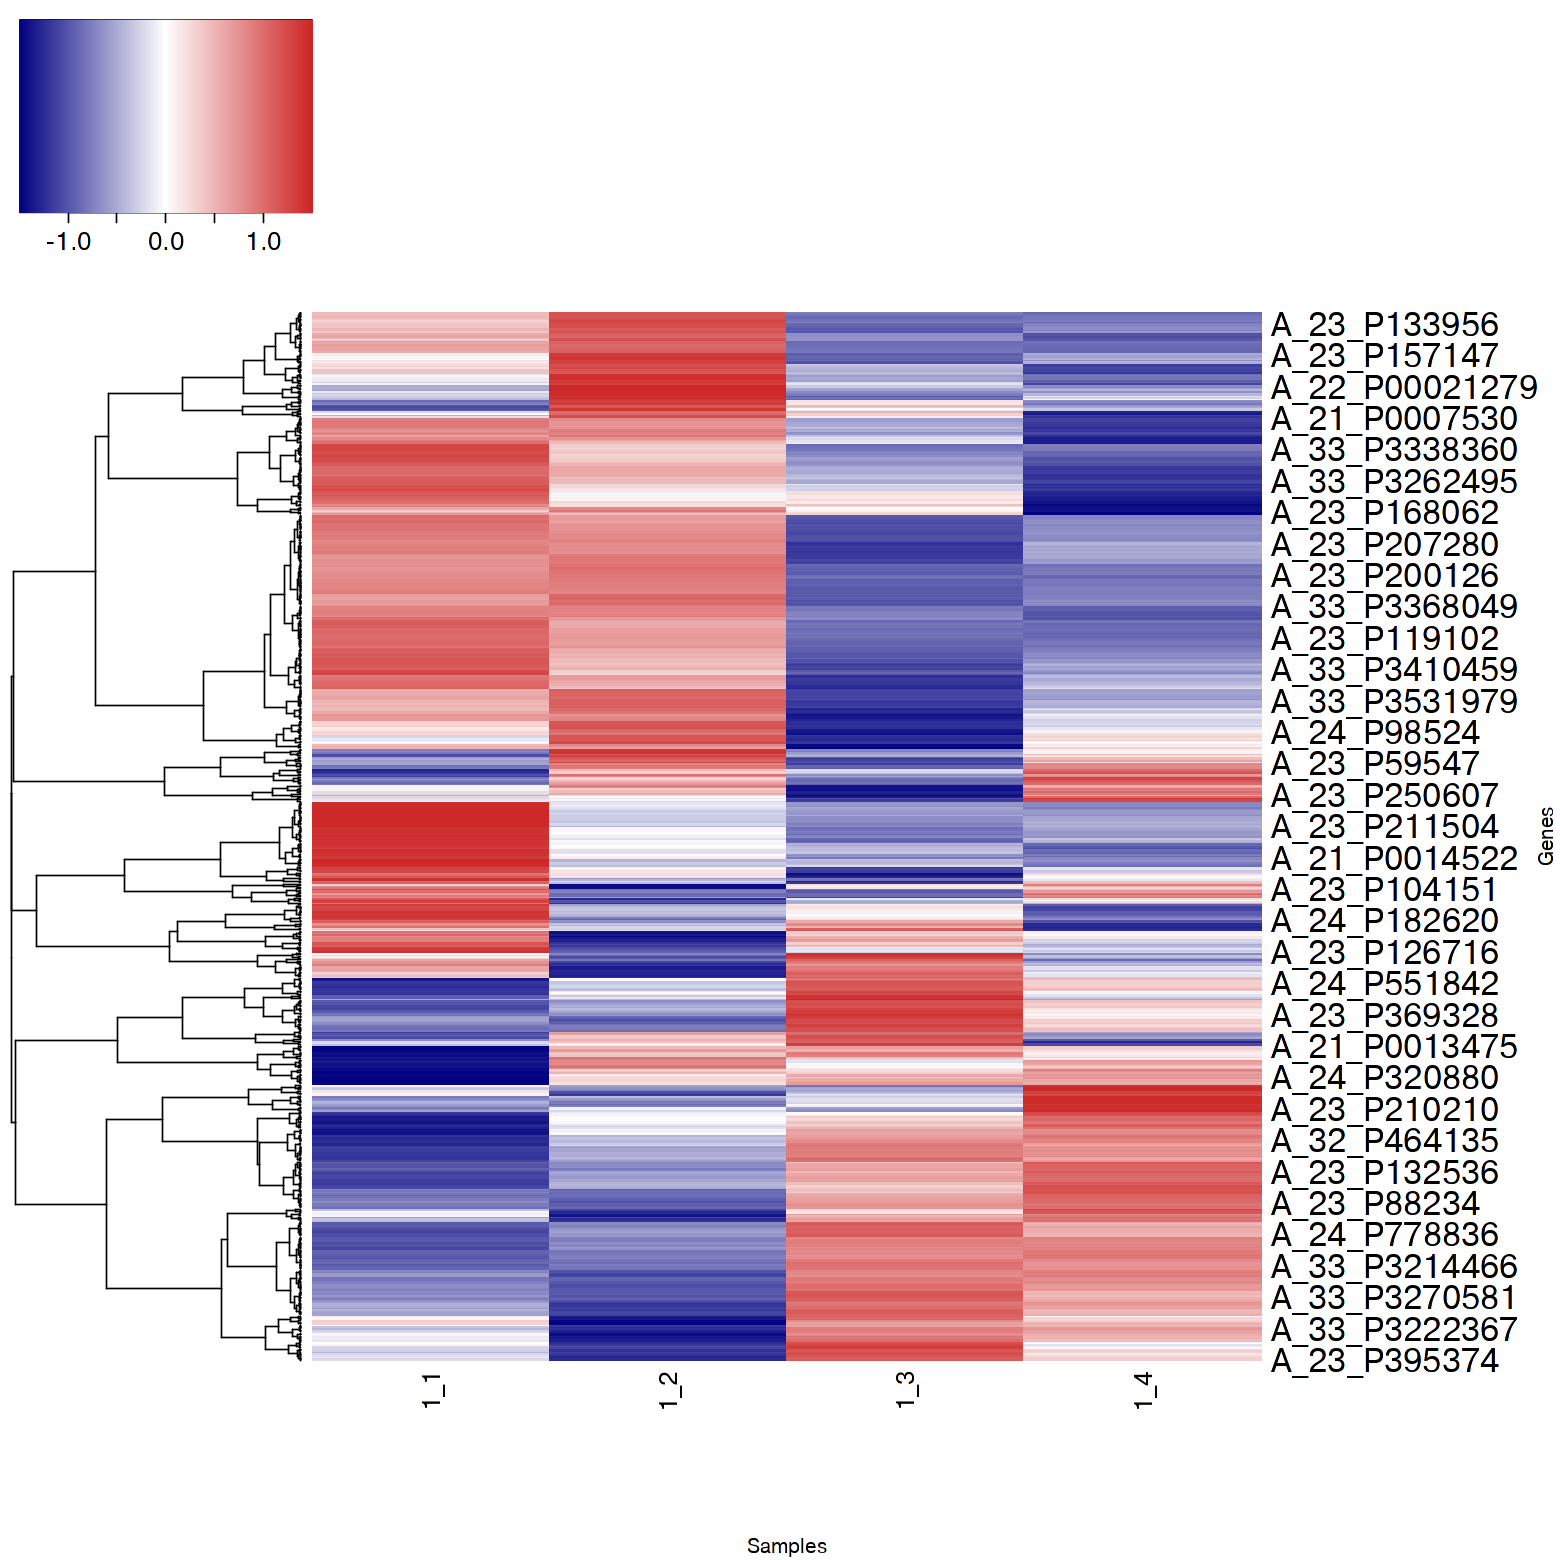

In [183]:
#options(repr.plot.width=13, repr.plot.height=13)
png("heatmap_H247_H322.png", width = 500, height = 500)
heatmap_plot(top_table_HEK_vars[which(top_table_HEK_vars$ControlType == 0),], full_matrix_HEK_vars)
dev.off()

## H247 vs ref1

In [184]:
raw_data_H247 = read.maimages(targets$sampleName[1:2], source="agilent")
data_normW_H247 = normalizeWithinArrays(raw_data_H247, method = 'loess', bc.method = "auto", offset = 20)
data_normB_H247 = normalizeBetweenArrays(data_normW_H247, method="Aquantile")
data_normB_H247 <- avereps(data_normB_H247, ID = data_normB_H247$genes$SystematicName)
print(summary(data_normB_H247$M))
mod_targets_H247 = targets[1:2,]
mod_targets_H247$Cy3 = mod_targets_H247$reference
mod_targets_H247$Cy5 = mod_targets_H247$CellType
design_H247 = modelMatrix(mod_targets_H247, ref="Ref1")
fit_H247 = lmFit(data_normB_H247, design_H247)
fit_eb_H247 = eBayes(fit_H247)
top_table_H247 = topTable(fit_eb_H247, adjust = 'BH', coef = 1, number = 99999, lfc=0, p.value = 0.05)
top_table_H247 = top_table_H247[which(top_table_H247$ControlType == 0),]
write.csv(top_table_H247, "DE_H247_Ref1.csv")
top_table_H247

Read 1_1.txt 
Read 1_2.txt 
      1_1                 1_2          
 Min.   :-8.330852   Min.   :-2.79321  
 1st Qu.:-0.135273   1st Qu.:-0.13313  
 Median : 0.000515   Median : 0.00404  
 Mean   : 0.002727   Mean   : 0.01092  
 3rd Qu.: 0.143895   3rd Qu.: 0.14914  
 Max.   : 3.468270   Max.   : 3.28228  
 NA's   :8           NA's   :1         
Found unique target names:
 HEK Ref1 


,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_020677,163,83,0,A_23_P26649,NM_020677,-1.812246,7.190715,-19.97627,2.356857e-08,0.0003119972,8.769827
ENST00000647353,83,91,0,A_22_P00011158,ENST00000647353,1.559174,7.991785,17.06886,8.539047e-08,0.0004760803,7.938315
NM_018933,351,73,0,A_23_P144627,NM_018933,1.536348,9.170460,16.34080,1.217924e-07,0.0006111300,7.690440
NM_138463,283,20,0,A_23_P420417,NM_138463,1.467502,7.221030,15.66844,1.713624e-07,0.0007816928,7.444804
NR_046287,384,151,0,A_22_P00012736,NR_046287,-1.476643,9.010351,-15.36010,2.013432e-07,0.0007848933,7.326395
NM_001044305,233,94,0,A_24_P380348,NM_001044305,1.463505,6.650895,15.21475,2.174723e-07,0.0007848933,7.269259
NM_017763,225,48,0,A_33_P3213029,NM_017763,-1.381502,7.123264,-15.20169,2.189905e-07,0.0007848933,7.264084
NM_153350,127,70,0,A_23_P406385,NM_153350,-1.337287,8.739897,-14.47061,3.262638e-07,0.0010034694,6.962841
NM_001702,296,153,0,A_33_P3285470,NM_001702,-1.297485,9.561894,-14.29545,3.599675e-07,0.0010034694,6.887170


In [185]:
top_table_H247[which(top_table_H247$SystematicName == "NM_000618"),]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_000618,15,70,0,A_23_P13907,NM_000618,1.200641,7.982291,12.88526,8.294135e-07,0.001396954,6.223498


In [186]:
raw_data_H322 = read.maimages(targets$sampleName[3:4], source="agilent")
data_normW_H322 = normalizeWithinArrays(raw_data_H322, method = 'loess', bc.method = "auto", offset = 20)
data_normB_H322 = normalizeBetweenArrays(data_normW_H322, method="Aquantile")
data_normB_H322 <- avereps(data_normB_H322, ID = data_normB_H322$genes$SystematicName)
mod_targets_H322 = targets[3:4,]
mod_targets_H322$Cy3 = mod_targets_H322$reference
mod_targets_H322$Cy5 = mod_targets_H322$CellType
design_H322 = modelMatrix(mod_targets_H322, ref="Ref1")
fit_H322 = lmFit(data_normB_H322, design_H322)
fit_eb_H322 = eBayes(fit_H322)
top_table_H322 = topTable(fit_eb_H322, adjust = 'BH', coef = 1, number = 99999, lfc=0.58, p.value = 0.05)
top_table_H322 = top_table_H322[which(top_table_H322$ControlType == 0),]
write.csv(top_table_H322, "DE_H322_Ref1.csv")
top_table_H322

Read 1_3.txt 
Read 1_4.txt 
Found unique target names:
 HEK Ref1 


,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_005345,17,62,0,A_23_P111132,NM_005345,-5.891091,10.885042,-52.30684,8.701678e-22,4.366328e-17,34.46212
NM_000067,136,71,0,A_23_P8913,NM_000067,4.388040,8.550273,46.65618,7.311995e-21,1.834506e-16,33.39315
NM_002133,11,69,0,A_23_P120883,NM_002133,-3.835225,10.158927,-40.14974,1.190735e-19,1.991623e-15,31.80018
NM_001099645,229,152,0,A_23_P143958,NM_001099645,3.512044,11.822391,38.38385,2.741563e-19,3.439154e-15,31.28244
NM_001007533,15,17,0,A_33_P3287472,NM_001007533,3.123708,6.840973,30.57268,1.833841e-17,1.840369e-13,28.39726
NM_153350,127,70,0,A_23_P406385,NM_153350,-2.376266,8.278783,-25.92780,3.767091e-16,2.407182e-12,26.06367
NM_001350211,166,161,0,A_23_P96599,NM_001350211,-2.503048,6.527775,-25.90141,3.837829e-16,2.407182e-12,26.04871
NR_121621,199,66,0,A_21_P0005818,NR_121621,-2.297910,7.060998,-25.15608,6.540059e-16,3.646301e-12,25.61707
NM_001302688,222,53,0,A_33_P3223592,NM_001302688,2.101606,8.615418,22.99361,3.355886e-15,1.683917e-11,24.25914


In [153]:
a=which(top_table_H322$SystematicName == "NM_000618")
top_table_H322[a,]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_000618,15,70,0,A_23_P13907,NM_000618,1.067159,7.197387,7.549227,5.656331e-06,0.001005246,4.386091
